# Generators (Star-coordinate Plots)

## Notebook for generating basic radviz plots of the Pareto-optimal fronts with appropriate colorings and point-sizes.

This notebook can be used to generate basic star-coordinate plots [[1]](#1) of all the Pareto-optimal fronts with suitable colorings and point-sizes. This notebook tests the `star()` fucntion from the `vis.plotting` module. All the Pareto-optimal data point files hard-coded in the dictionary `pfs`. Currently this notebook provides these Pareto-optimal fronts.

- DTLZ2 ($m$-Sphere) Problem
- DEBMDK (Knee) Problem
- CDEBMDK (Constrained Knee) Problem
- C0-DTLZ2 (A split $m$-sphere with a small isolated cluster at $f_m$-axis)
- C2-DTLZ2 Problem
- DTLZ8 Problem (A 3-dimensional line and an $m$-dimensional hypersurface)
- GAA Problem (A 10-objective and 18-constraint general aviation design problem)

<a id="1">[1]</a> 
Eser Kandogan. 2001. Visualizing Multi-dimensional Clusters, Trends, and Outliers Using Star Coordinates. In Proceedings of the Seventh ACM SIGKDD International Conference on Knowledge Discovery and Data Mining (KDD '01). ACM, New York, NY, USA, 107--116.

In [1]:
%reload_ext autoreload
%autoreload 2

import sys
import os

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mc
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams.update({'figure.max_open_warning': 0})

### Generate and save plots.

In [2]:
sys.path.append('../')
from vis.utils import io
from vis.utils import transform as tr

def load_props(path):
    r"""
    Load CV, Mu, Ik and S from path.
    """
    CV = None
    cvpathf = os.path.join(path, "datacv.csv")
    if os.path.exists(cvpathf):
        CV = np.loadtxt(cvpathf)

    # load the Mu values
    Mu = None
    mupathf = os.path.join(path, "mu.csv")
    if os.path.exists(mupathf):
        Mu = np.loadtxt(mupathf)

    # load the knee indices
    Ik = None
    kpathf = os.path.join(path, "muid.csv")
    if os.path.exists(kpathf):
        Ik = np.loadtxt(kpathf, dtype = int)
        
    return CV, Mu, Ik

def decide_size_color(CV, Mu, Ik):
    r"""
    Decide point-size and color from `CV`, `Mu` and `Ik`
    """
    # decide point-size
    S = 1
    if Mu is not None and Ik is not None:
        S = tr.resize_by_tradeoff(Mu, k = Ik)

    # decide colors
    # C = tr.default_color(F.shape[0], alpha = 0.5)
    M = np.mean(F, axis = 0)
    C = tr.color_by_dist(F, M)
    
    # if CV is available, use CV to color
    if CV is not None:
        C = tr.color_by_cv(CV)

    # enhance knee points
    if Ik is not None:
        C = tr.enhance_color(C, Ik)
    return S, C

../data/dtlz2/3d/dataf.csv (1000, 3) ['..', 'data', 'dtlz2', '3d'] dtlz2


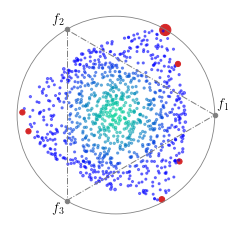

../data/dtlz2/4d/dataf.csv (2000, 4) ['..', 'data', 'dtlz2', '4d'] dtlz2


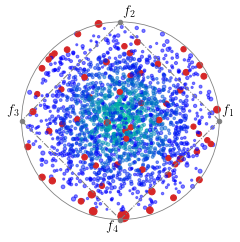

../data/dtlz2/8d/dataf.csv (4000, 8) ['..', 'data', 'dtlz2', '8d'] dtlz2


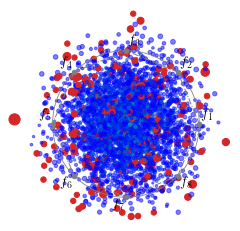

../data/dtlz2-nbi/3d/dataf.csv (990, 3) ['..', 'data', 'dtlz2-nbi', '3d'] dtlz2-nbi


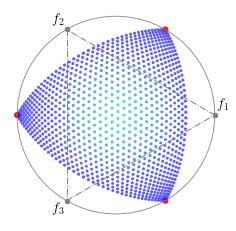

../data/dtlz2-nbi/4d/dataf.csv (1771, 4) ['..', 'data', 'dtlz2-nbi', '4d'] dtlz2-nbi


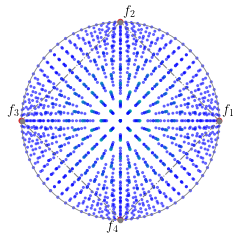

../data/dtlz2-nbi/8d/dataf.csv (3432, 8) ['..', 'data', 'dtlz2-nbi', '8d'] dtlz2-nbi


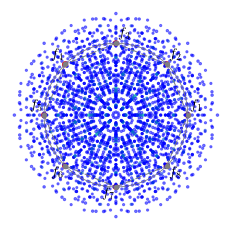

../data/debmdk/3d/dataf.csv (1047, 3) ['..', 'data', 'debmdk', '3d'] debmdk


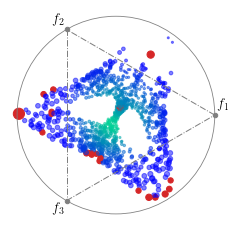

../data/debmdk/4d/dataf.csv (1967, 4) ['..', 'data', 'debmdk', '4d'] debmdk


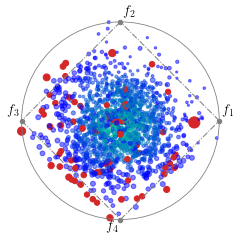

../data/debmdk/8d/dataf.csv (4077, 8) ['..', 'data', 'debmdk', '8d'] debmdk


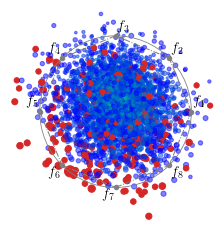

../data/debmdk-nbi/3d/dataf.csv (1143, 3) ['..', 'data', 'debmdk-nbi', '3d'] debmdk-nbi


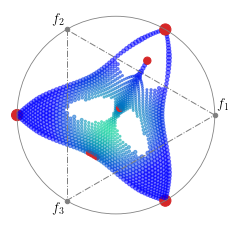

../data/debmdk-nbi/4d/dataf.csv (2028, 4) ['..', 'data', 'debmdk-nbi', '4d'] debmdk-nbi


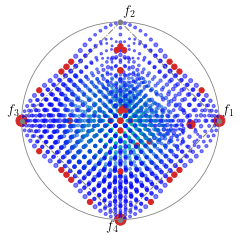

../data/debmdk-nbi/8d/dataf.csv (3432, 8) ['..', 'data', 'debmdk-nbi', '8d'] debmdk-nbi


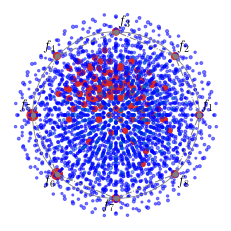

../data/debmdk-all/3d/dataf.csv (1000, 3) ['..', 'data', 'debmdk-all', '3d'] debmdk-all


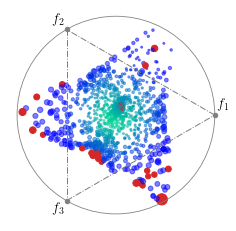

../data/debmdk-all/4d/dataf.csv (2000, 4) ['..', 'data', 'debmdk-all', '4d'] debmdk-all


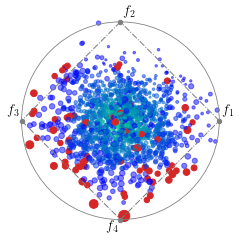

../data/debmdk-all/8d/dataf.csv (4000, 8) ['..', 'data', 'debmdk-all', '8d'] debmdk-all


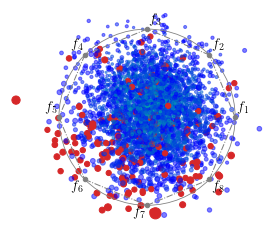

../data/debmdk-all-nbi/3d/dataf.csv (990, 3) ['..', 'data', 'debmdk-all-nbi', '3d'] debmdk-all-nbi


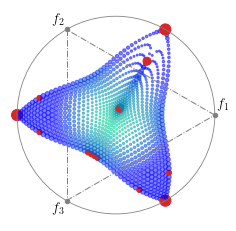

../data/debmdk-all-nbi/4d/dataf.csv (1771, 4) ['..', 'data', 'debmdk-all-nbi', '4d'] debmdk-all-nbi


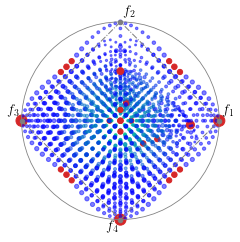

../data/debmdk-all-nbi/8d/dataf.csv (3432, 8) ['..', 'data', 'debmdk-all-nbi', '8d'] debmdk-all-nbi


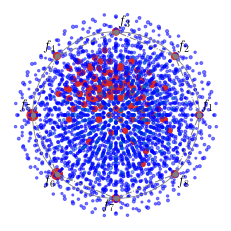

../data/dtlz8/3d/dataf.csv (1038, 3) ['..', 'data', 'dtlz8', '3d'] dtlz8


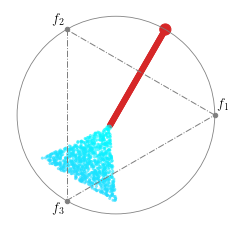

../data/dtlz8/4d/dataf.csv (2105, 4) ['..', 'data', 'dtlz8', '4d'] dtlz8


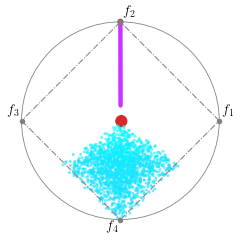

../data/dtlz8/6d/dataf.csv (2659, 6) ['..', 'data', 'dtlz8', '6d'] dtlz8


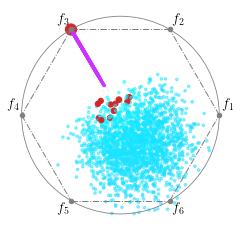

../data/dtlz8/8d/dataf.csv (3680, 8) ['..', 'data', 'dtlz8', '8d'] dtlz8


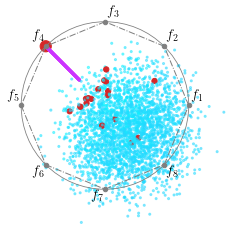

../data/dtlz8-nbi/3d/dataf.csv (1025, 3) ['..', 'data', 'dtlz8-nbi', '3d'] dtlz8-nbi


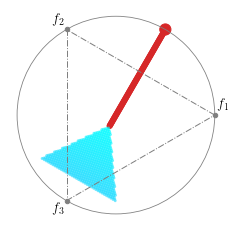

../data/dtlz8-nbi/4d/dataf.csv (2088, 4) ['..', 'data', 'dtlz8-nbi', '4d'] dtlz8-nbi


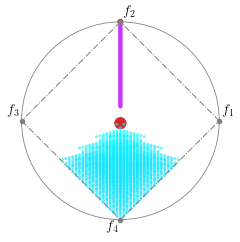

../data/dtlz8-nbi/6d/dataf.csv (3535, 6) ['..', 'data', 'dtlz8-nbi', '6d'] dtlz8-nbi


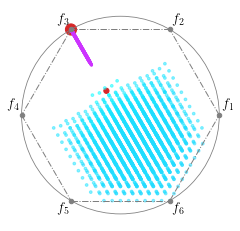

../data/dtlz8-nbi/8d/dataf.csv (2277, 8) ['..', 'data', 'dtlz8-nbi', '8d'] dtlz8-nbi


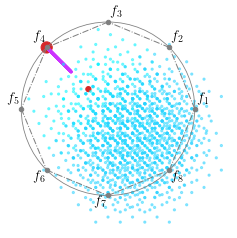

../data/c2dtlz2/3d/dataf.csv (1086, 3) ['..', 'data', 'c2dtlz2', '3d'] c2dtlz2


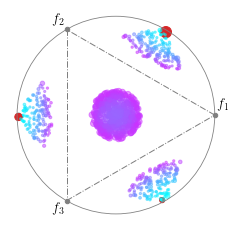

../data/c2dtlz2/4d/dataf.csv (2088, 4) ['..', 'data', 'c2dtlz2', '4d'] c2dtlz2


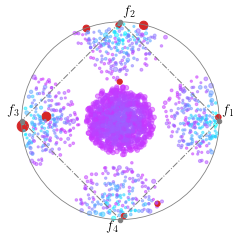

../data/c2dtlz2/5d/dataf.csv (2098, 5) ['..', 'data', 'c2dtlz2', '5d'] c2dtlz2


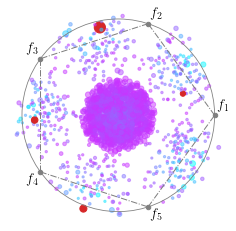

../data/c2dtlz2/8d/dataf.csv (4305, 8) ['..', 'data', 'c2dtlz2', '8d'] c2dtlz2


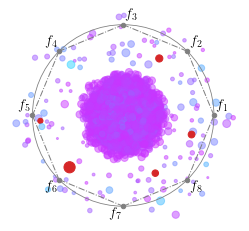

../data/c2dtlz2-nbi/3d/dataf.csv (1036, 3) ['..', 'data', 'c2dtlz2-nbi', '3d'] c2dtlz2-nbi


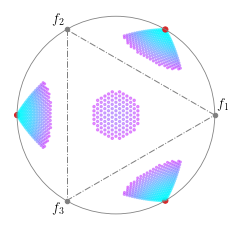

../data/c2dtlz2-nbi/4d/dataf.csv (1984, 4) ['..', 'data', 'c2dtlz2-nbi', '4d'] c2dtlz2-nbi


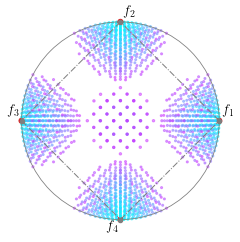

../data/c2dtlz2-nbi/5d/dataf.csv (2280, 5) ['..', 'data', 'c2dtlz2-nbi', '5d'] c2dtlz2-nbi


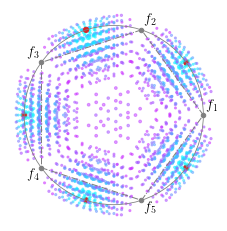

../data/c2dtlz2-nbi/8d/dataf.csv (3872, 8) ['..', 'data', 'c2dtlz2-nbi', '8d'] c2dtlz2-nbi


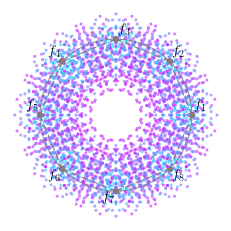

../data/cdebmdk/3d/dataf.csv (1099, 3) ['..', 'data', 'cdebmdk', '3d'] cdebmdk


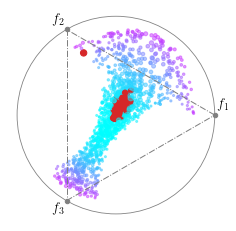

../data/cdebmdk/4d/dataf.csv (1982, 4) ['..', 'data', 'cdebmdk', '4d'] cdebmdk


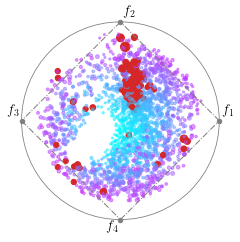

../data/cdebmdk/8d/dataf.csv (3919, 8) ['..', 'data', 'cdebmdk', '8d'] cdebmdk


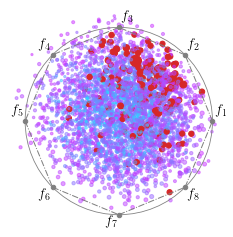

../data/cdebmdk-nbi/3d/dataf.csv (1049, 3) ['..', 'data', 'cdebmdk-nbi', '3d'] cdebmdk-nbi


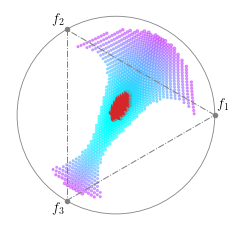

../data/cdebmdk-nbi/4d/dataf.csv (2042, 4) ['..', 'data', 'cdebmdk-nbi', '4d'] cdebmdk-nbi


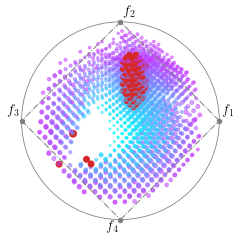

../data/cdebmdk-nbi/8d/dataf.csv (3380, 8) ['..', 'data', 'cdebmdk-nbi', '8d'] cdebmdk-nbi


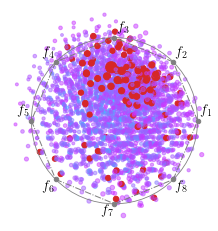

../data/c0dtlz2/3d/dataf.csv (1002, 3) ['..', 'data', 'c0dtlz2', '3d'] c0dtlz2


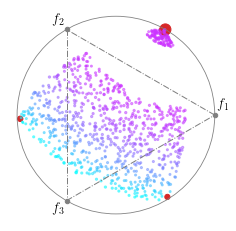

../data/c0dtlz2/4d/dataf.csv (2003, 4) ['..', 'data', 'c0dtlz2', '4d'] c0dtlz2


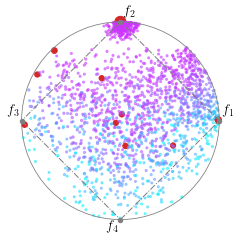

../data/c0dtlz2/8d/dataf.csv (4005, 8) ['..', 'data', 'c0dtlz2', '8d'] c0dtlz2


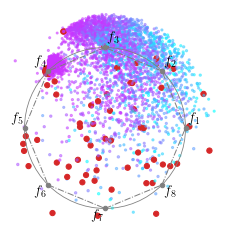

../data/c0dtlz2-nbi/3d/dataf.csv (983, 3) ['..', 'data', 'c0dtlz2-nbi', '3d'] c0dtlz2-nbi


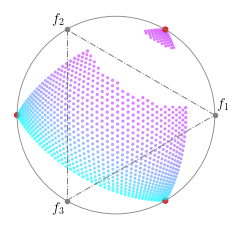

../data/c0dtlz2-nbi/4d/dataf.csv (1916, 4) ['..', 'data', 'c0dtlz2-nbi', '4d'] c0dtlz2-nbi


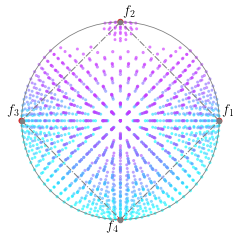

../data/c0dtlz2-nbi/8d/dataf.csv (3180, 8) ['..', 'data', 'c0dtlz2-nbi', '8d'] c0dtlz2-nbi


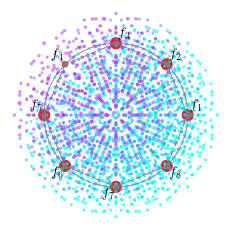

../data/crash-nbi/3d/dataf.csv (4450, 3) ['..', 'data', 'crash-nbi', '3d'] crash-nbi


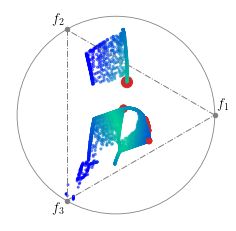

../data/crash-c1-nbi/3d/dataf.csv (711, 3) ['..', 'data', 'crash-c1-nbi', '3d'] crash-c1-nbi


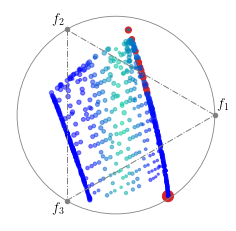

../data/crash-c2-nbi/3d/dataf.csv (3739, 3) ['..', 'data', 'crash-c2-nbi', '3d'] crash-c2-nbi


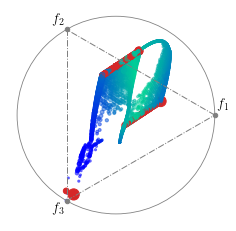

../data/gaa/10d/dataf.csv (3112, 10) ['..', 'data', 'gaa', '10d'] gaa


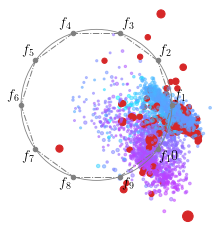

../data/gaa-nbi/10d/dataf.csv (3112, 10) ['..', 'data', 'gaa-nbi', '10d'] gaa-nbi


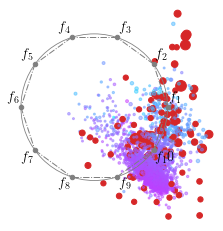

In [3]:
%matplotlib inline
sys.path.append('../')
from vis.plotting import star

pfs = {'dtlz2': ['3d', '4d', '8d'], \
       'dtlz2-nbi': ['3d', '4d', '8d'], \
       'debmdk': ['3d', '4d', '8d'], \
       'debmdk-nbi': ['3d', '4d', '8d'], \
       'debmdk-all': ['3d', '4d', '8d'], \
       'debmdk-all-nbi': ['3d', '4d', '8d'], \
       'dtlz8': ['3d', '4d', '6d', '8d'], \
       'dtlz8-nbi': ['3d', '4d', '6d', '8d'], \
       'c2dtlz2': ['3d', '4d', '5d', '8d'], \
       'c2dtlz2-nbi': ['3d', '4d', '5d', '8d'], \
       'cdebmdk': ['3d', '4d', '8d'], \
       'cdebmdk-nbi': ['3d', '4d', '8d'], \
       'c0dtlz2': ['3d', '4d', '8d'], \
       'c0dtlz2-nbi': ['3d', '4d', '8d'], \
       'crash-nbi': ['3d'], 'crash-c1-nbi': ['3d'], 'crash-c2-nbi': ['3d'], \
       'gaa': ['10d'], \
       'gaa-nbi': ['10d']}

for pf in list(pfs.keys()):
    for dim in pfs[pf]:
        fullpathf = "../data/{0:s}/{1:s}/dataf.csv".format(pf, dim)
        if os.path.exists(fullpathf):
            path, filenamef = os.path.split(fullpathf)
            dirs = path.split('/')
            frontname = dirs[-2]

            # load the front
            F = np.loadtxt(fullpathf, delimiter = ',')
            print(fullpathf, F.shape, dirs, frontname)
            
            CV, Mu, Ik = load_props(path)
            S,C = decide_size_color(CV, Mu, Ik)
            
            figpath = os.path.join(path, "star.pdf")
            with plt.rc_context({"text.usetex": True, "font.size": 12}):
                star(F, plt=plt, s=S, c=C)
                # save the fig
                plt.savefig(figpath, bbox_inches = 'tight', dpi = 150)
                plt.show()